In [2]:
import fastai
from fastai.vision import *
import pandas as pd
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from pathlib import Path
import csv
import glob

In [3]:
pathTrain = Path('./picnic/train')

In [4]:
pathTSV = Path('./picnic/train.tsv')

In [6]:
df = pd.read_csv(pathTSV, sep='\t')

In [7]:
bunch = ImageDataBunch.from_df(pathTrain, df, size=224)

/opt/conda/envs/fastai/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


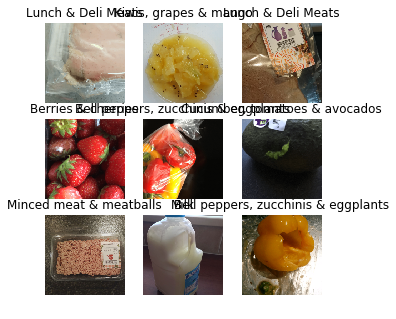

In [15]:
bunch.show_batch(rows=3, figsize=(5,5))

In [8]:
learn = create_cnn(bunch, models.resnet50, metrics=accuracy)

In [17]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy
1,1.356053,0.897783,0.738801


In [18]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy
1,0.831050,0.850922,0.749828
2,0.685310,0.696123,0.798759
3,0.440751,0.666914,0.803584


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(bunch.valid_ds)==len(losses)==len(idxs)

True

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fcee70772b0>>
Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


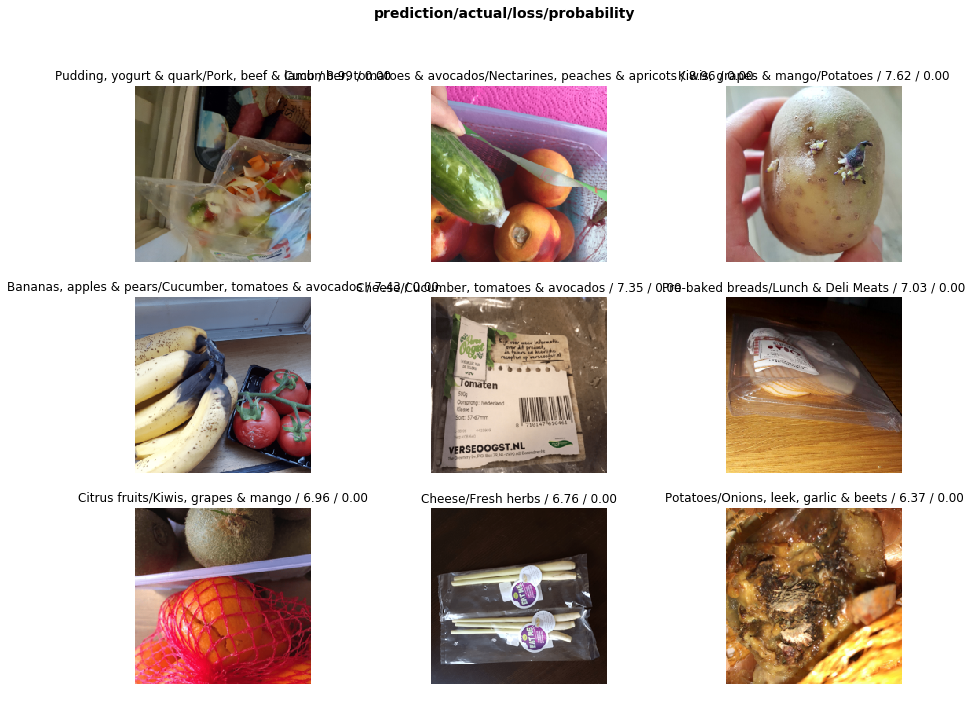

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

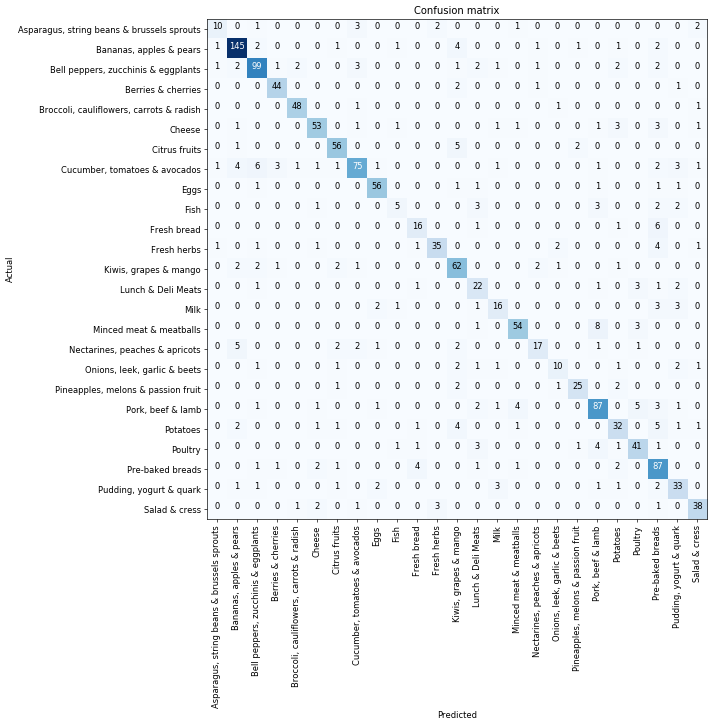

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused(min_val=2)

[('Minced meat & meatballs', 'Pork, beef & lamb', 8),
 ('Cucumber, tomatoes & avocados', 'Bell peppers, zucchinis & eggplants', 6),
 ('Fresh bread', 'Pre-baked breads', 6),
 ('Citrus fruits', 'Kiwis, grapes & mango', 5),
 ('Nectarines, peaches & apricots', 'Bananas, apples & pears', 5),
 ('Pork, beef & lamb', 'Poultry', 5),
 ('Potatoes', 'Pre-baked breads', 5),
 ('Bananas, apples & pears', 'Kiwis, grapes & mango', 4),
 ('Cucumber, tomatoes & avocados', 'Bananas, apples & pears', 4),
 ('Fresh herbs', 'Pre-baked breads', 4),
 ('Pork, beef & lamb', 'Minced meat & meatballs', 4),
 ('Potatoes', 'Kiwis, grapes & mango', 4),
 ('Poultry', 'Pork, beef & lamb', 4),
 ('Pre-baked breads', 'Fresh bread', 4),
 ('Asparagus, string beans & brussels sprouts',
  'Cucumber, tomatoes & avocados',
  3),
 ('Bell peppers, zucchinis & eggplants', 'Cucumber, tomatoes & avocados', 3),
 ('Cheese', 'Potatoes', 3),
 ('Cheese', 'Pre-baked breads', 3),
 ('Cucumber, tomatoes & avocados', 'Berries & cherries', 3),
 ('

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


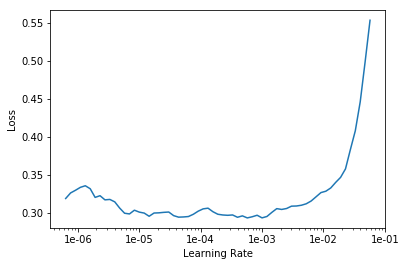

In [25]:
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.310818,0.650002,0.802205
2,0.259862,0.632021,0.810476
3,0.196622,0.627697,0.809786


In [27]:
learn.save('stage-1')

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


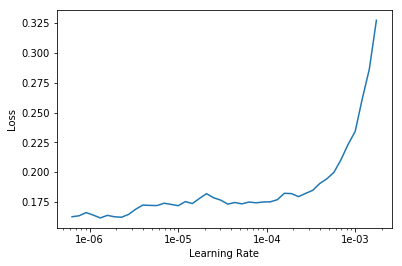

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy
1,0.234579,0.734645,0.790489
2,0.744289,1.415280,0.643005
3,0.681816,1.062809,0.711923
4,0.417057,0.938065,0.753274
5,0.204323,0.737590,0.816678
6,0.083861,0.636260,0.842867
7,0.032675,0.614107,0.851137
8,0.015752,0.602134,0.850448


In [31]:
learn.save('stage-85')

In [9]:
learn.load('stage-85')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (5808 items)
[Category Bananas, apples & pears, Category Berries & cherries, Category Pork, beef & lamb, Category Berries & cherries, Category Bell peppers, zucchinis & eggplants]...
Path: picnic/train
x: ImageItemList (5808 items)
[Image (3, 1000, 563), Image (3, 1000, 562), Image (3, 1600, 899), Image (3, 1000, 748), Image (3, 480, 640)]...
Path: picnic/train;

Valid: LabelList
y: CategoryList (1451 items)
[Category Cucumber, tomatoes & avocados, Category Kiwis, grapes & mango, Category Lunch & Deli Meats, Category Berries & cherries, Category Pork, beef & lamb]...
Path: picnic/train
x: ImageItemList (1451 items)
[Image (3, 1200, 1600), Image (3, 1000, 749), Image (3, 1000, 749), Image (3, 1000, 749), Image (3, 750, 1000)]...
Path: picnic/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentu

In [12]:
log_preds, y = learn.TTA()


In [18]:
probs = np.mean(np.exp(log_preds), axis=0)
accuracy_np(probs,y)

TypeError: mean() missing 3 required positional argument: "dim", "keepdim", "dtype"

In [20]:
preds = learn.get_preds()

In [22]:
str(preds[0])

'tensor([[1.6966e-05, 1.4901e-05, 4.7056e-05,  ..., 4.3109e-06, 4.3715e-07,\n         4.4519e-07],\n        [7.1535e-06, 6.6742e-06, 1.5086e-07,  ..., 2.8311e-08, 5.5822e-08,\n         6.6210e-08],\n        [1.1369e-04, 5.8517e-03, 1.4001e-02,  ..., 2.0117e-02, 2.6351e-01,\n         6.7146e-04],\n        ...,\n        [8.4821e-07, 1.7524e-06, 8.3284e-09,  ..., 2.7555e-05, 2.1391e-07,\n         1.2353e-08],\n        [1.2787e-06, 1.0000e+00, 5.3903e-08,  ..., 8.8726e-09, 1.4125e-07,\n         4.1312e-09],\n        [2.6332e-05, 1.1019e-02, 7.0711e-06,  ..., 2.8129e-05, 1.5447e-01,\n         7.1986e-05]])'

In [27]:
[filepath.stem for filepath in list( Path('./picnic/test').iterdir() ) ]

['7663',
 '7991',
 '7416',
 '7794',
 '7289',
 '8077',
 '7912',
 '7502',
 '7271',
 '7880',
 '7596',
 '7901',
 '7924',
 '7572',
 '7612',
 '7422',
 '8043',
 '8027',
 '7407',
 '8031',
 '7676',
 '7358',
 '7554',
 '7509',
 '7565',
 '8053',
 '7707',
 '7655',
 '7662',
 '7822',
 '7766',
 '8017',
 '7439',
 '7464',
 '7549',
 '7875',
 '7317',
 '7881',
 '8020',
 '7634',
 '7588',
 '7575',
 '7851',
 '7931',
 '7560',
 '7352',
 '7854',
 '7857',
 '7942',
 '7514',
 '7883',
 '8081',
 '7445',
 '7728',
 '7545',
 '7738',
 '7829',
 '7859',
 '7402',
 '8051',
 '7954',
 '7587',
 '7793',
 '7455',
 '7584',
 '7424',
 '7751',
 '7960',
 '7294',
 '7694',
 '7650',
 '7975',
 '7992',
 '7341',
 '7872',
 '7623',
 '8018',
 '7678',
 '7495',
 '7494',
 '7434',
 '7945',
 '7779',
 '8016',
 '7781',
 '7443',
 '7404',
 '8003',
 '7753',
 '7278',
 '7905',
 '7669',
 '7428',
 '7849',
 '7742',
 '7355',
 '7558',
 '7600',
 '8045',
 '7786',
 '7882',
 '7904',
 '7661',
 '7531',
 '7505',
 '7745',
 '7769',
 '7853',
 '7452',
 '7486',
 '7896',
 

In [41]:
str(bunch.valid_ds.x)

'ImageItemList (1451 items)\n[Image (3, 1200, 1600), Image (3, 1000, 749), Image (3, 1000, 749), Image (3, 1000, 749), Image (3, 750, 1000)]...\nPath: picnic/train'

In [45]:
test_preds, test_y = learn.get_preds()

In [53]:
str(bunch.valid_ds.x[200])

'Image (3, 1000, 750)'

In [48]:
bunch.classes

['Asparagus, string beans & brussels sprouts',
 'Bananas, apples & pears',
 'Bell peppers, zucchinis & eggplants',
 'Berries & cherries',
 'Broccoli, cauliflowers, carrots & radish',
 'Cheese',
 'Citrus fruits',
 'Cucumber, tomatoes & avocados',
 'Eggs',
 'Fish',
 'Fresh bread',
 'Fresh herbs',
 'Kiwis, grapes & mango',
 'Lunch & Deli Meats',
 'Milk',
 'Minced meat & meatballs',
 'Nectarines, peaches & apricots',
 'Onions, leek, garlic & beets',
 'Pineapples, melons & passion fruit',
 'Pork, beef & lamb',
 'Potatoes',
 'Poultry',
 'Pre-baked breads',
 'Pudding, yogurt & quark',
 'Salad & cress']

In [73]:
image = open_image(Path('./picnic/test/7267.jpeg'))

In [58]:
cat, idx, output = learn.predict(image)

In [59]:
str(cat)

'Eggs'

In [83]:
num = 7264
for x in range(2):
    num = 7263+x
    tempPath = ('./picnic/test/'+ str(num)+'.jpeg')
    image = open_image(Path(tempPath))
    cat, idx, output = learn.predict(image)
    print(str(cat))

Bell peppers, zucchinis & eggplants
Eggs
